#  02_Data_Preparation.ipynb

##  Overview
This notebook handles **data preparation** for the VisionGuard AI project.  
Steps:
1. Encode defect class labels into integers  
2. Organize train/validation/test splits  
3. Create PyTorch `Dataset` and `DataLoader` objects  
4. Apply transformations (resize, normalization, augmentation)  

**Developer:** Waqar Abid 

**Date:** 14 August 2025


## Import Required Libraries

In [11]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import torchvision


## Define Dataset Paths

In [12]:
# Update dataset path as per your system
dataset_dir = r"E:\Final project of Ats\screw_dataset"

train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

print(" Train Directory:", train_dir)
print(" Test Directory:", test_dir)


 Train Directory: E:\Final project of Ats\screw_dataset\train
 Test Directory: E:\Final project of Ats\screw_dataset\test


## Label Encoding

In [13]:
# Get class names
classes = sorted(os.listdir(train_dir))
class_to_idx = {cls: i for i, cls in enumerate(classes)}
idx_to_class = {i: cls for cls, i in class_to_idx.items()}

print(" Classes found:", classes)
print(" Class to Index Mapping:", class_to_idx)


 Classes found: ['good', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']
 Class to Index Mapping: {'good': 0, 'manipulated_front': 1, 'scratch_head': 2, 'scratch_neck': 3, 'thread_side': 4, 'thread_top': 5}


## Define Image Transformations

In [14]:
# Image preprocessing & augmentation
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


## Train & Validation Split

In [15]:
# Use torchvision.datasets.ImageFolder to auto-label images
full_train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)

# Split into train (80%) and validation (20%)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

print(f" Train samples: {len(train_dataset)}")
print(f" Validation samples: {len(val_dataset)}")


 Train samples: 360
 Validation samples: 91


## Test Dataset

In [16]:
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)
print(f" Test samples: {len(test_dataset)}")


 Test samples: 67


## Create DataLoaders

In [17]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(" Data loaders are ready!")


 Data loaders are ready!


## Visualize a Batch of Images

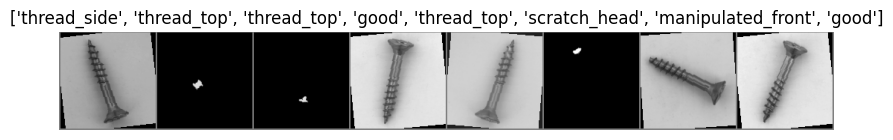

In [ ]:
# Function to visualize a batch
def imshow(img, title=None):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis("off")
    plt.show()

# Get one batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:8]),
       title=[idx_to_class[l.item()] for l in labels[:8]])


## Visualize Data Augmentations

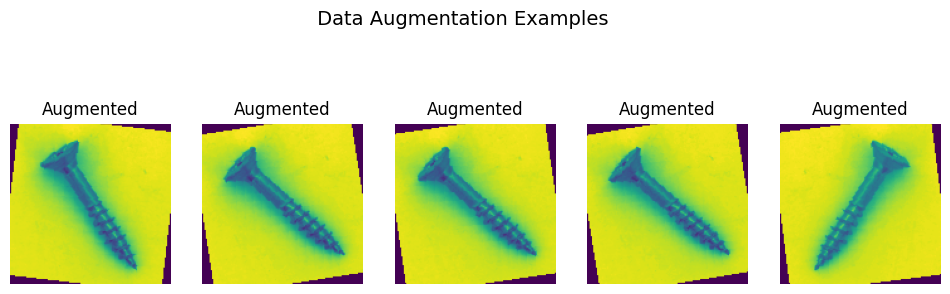

: 

In [ ]:
# Show multiple augmentations of the same image
sample_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
from PIL import Image

img = Image.open(sample_path)

plt.figure(figsize=(12,4))
for i in range(5):
    aug_img = train_transforms(img)
    plt.subplot(1,5,i+1)
    plt.imshow(np.transpose(aug_img.numpy(), (1,2,0)))
    plt.axis("off")
    plt.title("Augmented")
plt.suptitle(" Data Augmentation Examples", fontsize=14)
plt.show()
